# AIM:  Predict Weather passanger survived or not

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## The DataSet

In [2]:
df = pd.read_csv("titanic.csv")

In [3]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Exploratory Data Analysis

# Missing Data

Using seaborn to create a heatmap to see missing data
Seeing the null value 

In [4]:
df.isnull() #helps to find if missing dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<Axes: >

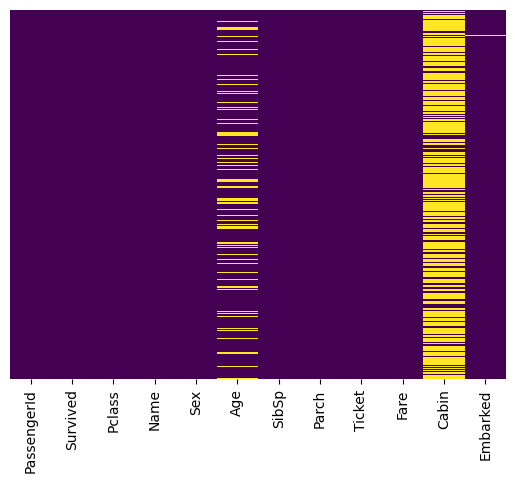

In [5]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
#null values are shown in yellow color
#yticklabels=False: This parameter specifies that the y-axis labels (row labels) should not be displayed on the heatmap. This can be useful to avoid clutter in the visualization, especially when dealing with a large number of rows.
#cbar=False: This parameter specifies that the color bar, which is usually included on the side of the heatmap to indicate the mapping of colors to values, should not be displayed. Setting it to False removes the color bar from the plot.
#cmap='virdis': This parameter specifies the color map to be used for the heatmap. In this case, the 'virdis' colormap from Matplotlib is used. Colormaps are used to map numerical values to colors in the heatmap, and 'virdis' is a perceptually uniform colormap that goes from yellow to green to blue ###.

Roughly 20 percent of the Age data is missing. The proportion of Age missing is likely small enough for reasonable replacement with some form of imputation. Looking at the Cabin column, it looks like we are just missing too much of that data to do something useful with at a basic level. We'll probably drop this later, or change it to another feature like "Cabin Known: 1 or 0"

Let's continue on by visualizing some more of the data! 

<Axes: xlabel='Survived', ylabel='count'>

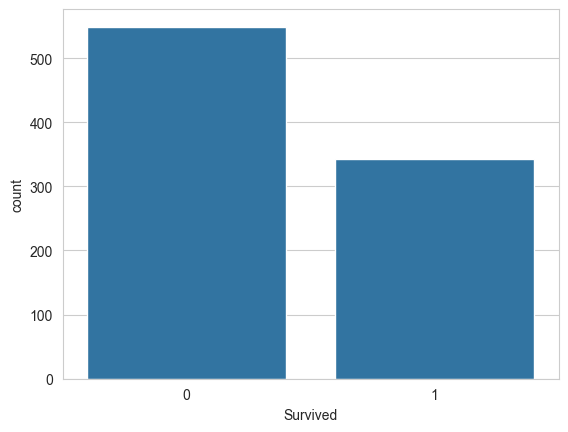

In [6]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', data =df)

<Axes: xlabel='Survived', ylabel='count'>

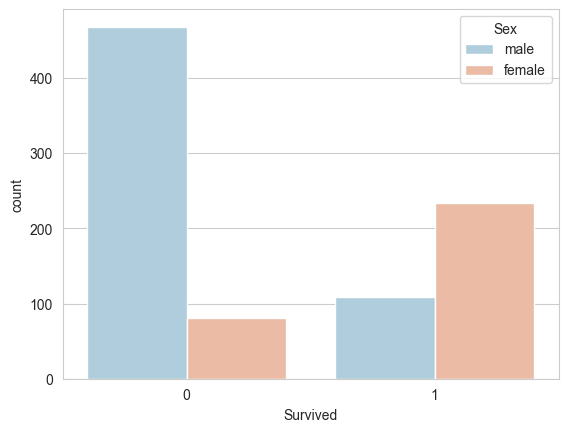

In [7]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Sex', data=df, palette='RdBu_r')

<Axes: xlabel='Survived', ylabel='count'>

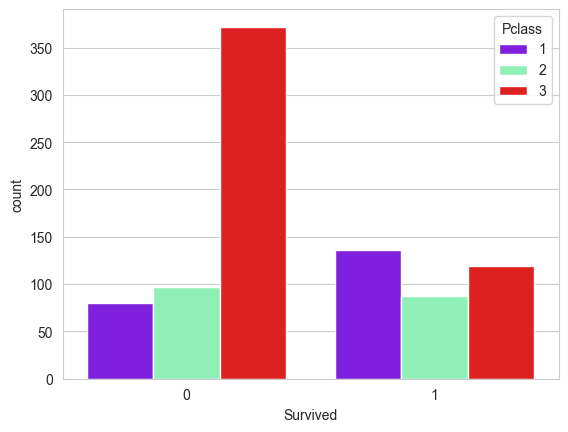

In [8]:
#Pclass= Passanger Class
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Pclass', data=df, palette='rainbow')

C:\Users\Admin\AppData\Local\Temp\ipykernel_6732\2132411754.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'].dropna(), kde=False, bins=40)


<Axes: xlabel='Age'>

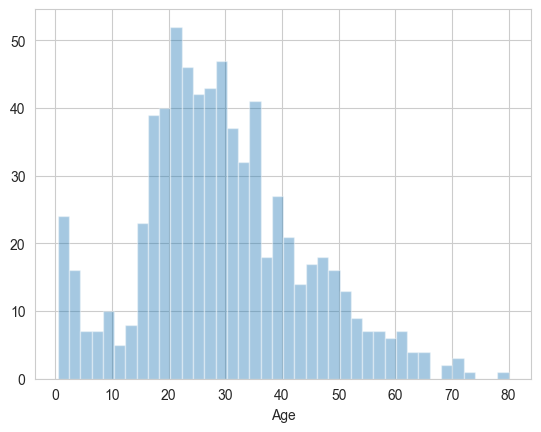

In [9]:
#distplot function to create a histogram of the 'Age' variable from the 'df' DataFrame.
#bins- shows in how much interval we want
sns.distplot(df['Age'].dropna(), kde=False, bins=40)
#dropna to remove null values

C:\Users\Admin\AppData\Local\Temp\ipykernel_6732\3224646618.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'].dropna(), kde=True, bins=40)


<Axes: xlabel='Age', ylabel='Density'>

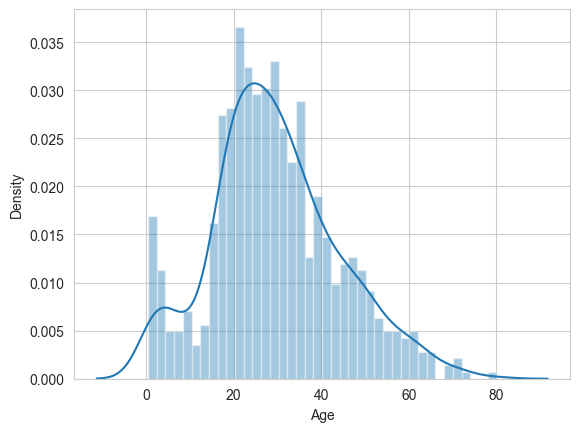

In [10]:
#distplot function to create a histogram of the 'Age' variable from the 'df' DataFrame.
#bins- shows in how much interval we want
sns.distplot(df['Age'].dropna(), kde=True, bins=40)

#we use either histplot or displot function


<Axes: >

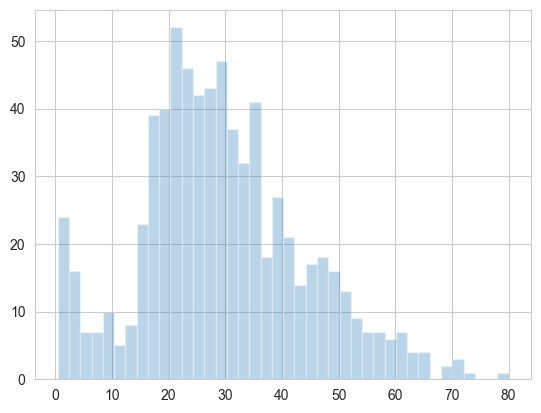

In [11]:

df['Age'].hist(bins=40, alpha=0.3)

<Axes: xlabel='SibSp', ylabel='count'>

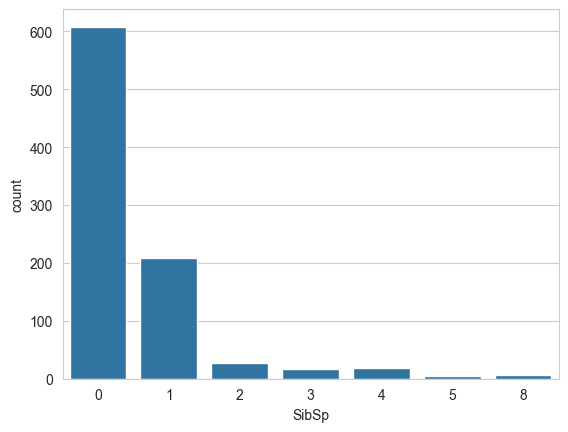

In [12]:
#countplot of siblings+ spouse
sns.countplot(x='SibSp', data=df)

<Axes: >

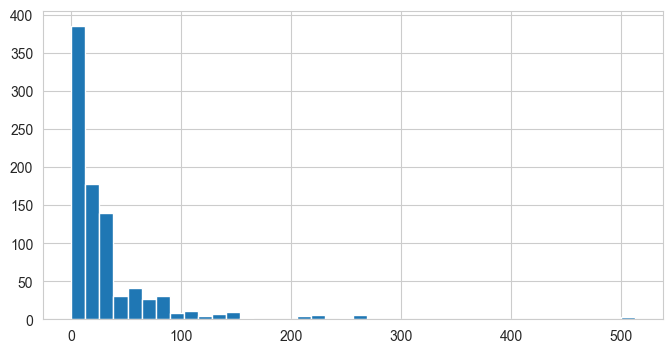

In [13]:
df['Fare'].hist(bins=40, figsize=(8,4) )

# Cufflinks for plots

Let's take a quick moment to show an example of cufflinks!

In [14]:
!pip install cufflinks
import cufflinks as cf
cf.go_offline()


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [15]:
df['Fare'].iplot(kind='hist',bins=30,color='green')

# Data Cleaning

filling the missing value

We want to fill in missing age data instead of just dropping the missing age data rows. One way to do this is by filling in the mean age of all the passengers (imputation). However we can be smarter about this and check the average age by passenger class. For example:

C:\Users\Admin\AppData\Local\Temp\ipykernel_6732\825966384.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




<Axes: xlabel='Pclass', ylabel='Age'>

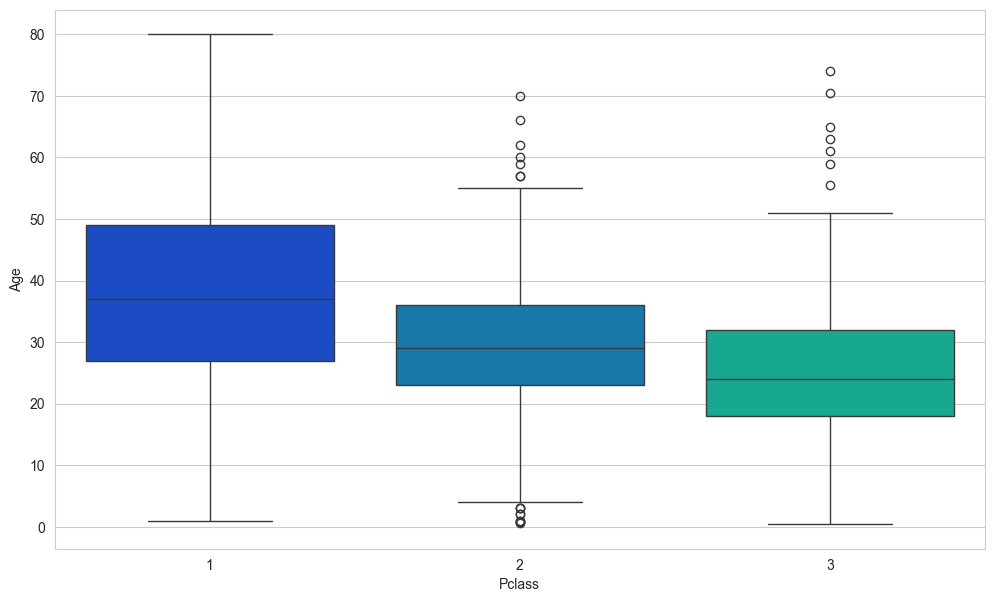

In [16]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass', y='Age', data=df, palette='winter')

 We can see the wealthier passengers in the higher classes tend to be older, which makes sense. We'll use these average age values to impute based on Pclass for Age.

In [17]:
def impute_age(cols):
    Age= cols[0]
    Pclass= cols[1]

    if pd.isnull(Age):
        if Pclass==1:
            return 37
        elif Pclass ==2:
            return 29
        else:
            return 24
    else:
        return Age

Now apply this function

In [18]:
df['Age']= df[['Age', 'Pclass']].apply(impute_age, axis=1)

C:\Users\Admin\AppData\Local\Temp\ipykernel_6732\1435820241.py:2: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\Admin\AppData\Local\Temp\ipykernel_6732\1435820241.py:3: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Now let's check the heatmap again to see how many null values are still missing

<Axes: >

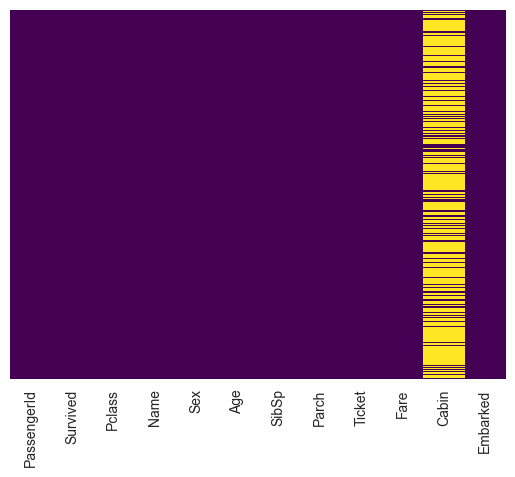

In [19]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

Great! Let's go ahead and drop the Cabin column and the row in Embarked that is NaN.

In [20]:
df.drop('Cabin', axis=1, inplace= True)

In [21]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


<Axes: >

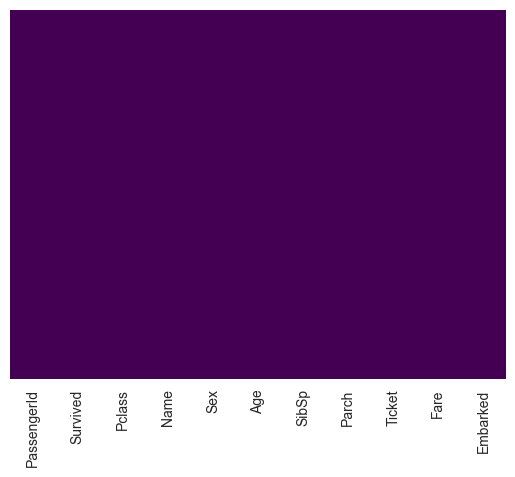

In [22]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [23]:
df.dropna(inplace=True)

# Converting Categorical Features

We will need to convert categorical features to dummy variables using pandas.(example
, making sex, female male as 0 and 1)
Otherwise our machine learning algorithm won't be able to directly take in these features as inputs

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [25]:
#applying dummy variable to Sex(2 category) and Embarked(3 category)
embark = pd.get_dummies(df['Embarked'], drop_first=False).astype(int).head(10)
embark

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
5,0,1,0
6,0,0,1
7,0,0,1
8,0,0,1
9,1,0,0


In [26]:
#representing the first coloum with the help of other two colums
result = pd.get_dummies(df['Embarked'], drop_first=True).astype(int).head(10)
result

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
5,1,0
6,0,1
7,0,1
8,0,1
9,0,0


In [27]:
sex= pd.get_dummies(df['Sex'], drop_first=True).astype(int).head()
sex

,male
0,1
1,0
2,0
3,0
4,1


In [28]:
df.drop(['Sex', 'Embarked', 'Name', 'Ticket'], axis=1, inplace= True)

In [29]:
df.head(8)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500
5,6,0,3,24.0,0,0,8.4583
6,7,0,1,54.0,0,0,51.8625
7,8,0,3,2.0,3,1,21.0750


In [30]:
#now appending our dummy variables
df= pd.concat([df,sex, embark],axis=1)

In [31]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,C,Q,S
0,1,0,3,22.0,1,0,7.2500,1.0,0.0,0.0,1.0
1,2,1,1,38.0,1,0,71.2833,0.0,1.0,0.0,0.0
2,3,1,3,26.0,0,0,7.9250,0.0,0.0,0.0,1.0
3,4,1,1,35.0,1,0,53.1000,0.0,0.0,0.0,1.0
4,5,0,3,35.0,0,0,8.0500,1.0,0.0,0.0,1.0


Now our data is ready

# Logistic Regression Model building

Let's start by splitting our data into a training set and test set (there is another test.csv file that you can play around with in case you want to use all this data for training).

## Train Test Split

In [44]:
df.drop('Survived', axis=1).head()  #dropping it because it is dependent feature 
#input dataset

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,C,Q,S
0,1,3,22.0,1,0,7.2500,1.0,0.0,0.0,1.0
1,2,1,38.0,1,0,71.2833,0.0,1.0,0.0,0.0
2,3,3,26.0,0,0,7.9250,0.0,0.0,0.0,1.0
3,4,1,35.0,1,0,53.1000,0.0,0.0,0.0,1.0
4,5,3,35.0,0,0,8.0500,1.0,0.0,0.0,1.0


In [45]:
#output dataset
df['Survived'].head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [46]:
import sklearn

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Survived', axis=1),
                                                   df['Survived'], test_size=0.3,
                                                   random_state=101)

1. using the train_test_split function from scikit-learn to split a dataset into training and testing sets
2. train.drop('Survived', axis=1): This part selects the features (independent variables) for the training and testing sets. It drops the 'Survived' column from the DataFrame
3. train['Survived']: This part selects the target variable (dependent variable) for the training and testing sets. It specifically selects the 'Survived' column from the DataFrame train
4. test_size=0.3: In this case, 30% of the data will be used for testing, and the remaining 70% will be used for training.
5. random_state=101: This parameter is used to ensure reproducibility. Setting a random_state value (an arbitrary number, in this case, 101) means that the random split will be the same every time you run the code. This is useful for getting consistent results when you need to replicate your analysis.
6. X_train, X_test, y_train, y_test: These variables store the resulting training and testing sets. X_train and X_test contain the feature sets for training and testing, respectively, while y_train and y_test contain the corresponding labels (target variable) for training and testing.
7. 

# Training and Predicting

In [56]:
X_train.fillna(X_train.mean(), inplace=True)

In [58]:
from sklearn.linear_model import LogisticRegression


In [59]:
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)



C:\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [61]:
X_test.fillna(X_train.mean(), inplace=True)

In [62]:
predictions= logmodel.predict(X_test)

logmodel.predict(X_test): This line uses the predict method of the logistic regression model to generate predictions based on the features in the test set (X_test). The resulting predictions are stored in the variable predictions

In [66]:
from sklearn.metrics import confusion_matrix

In [77]:
matrix = confusion_matrix(y_test, predictions)

In [78]:
matrix

array([[142,  21],
       [ 54,  50]], dtype=int64)

In [79]:
from sklearn.metrics import accuracy_score

In [80]:
accuracy= accuracy_score(y_test, predictions)

In [81]:
accuracy

0.7191011235955056

In [82]:
predictions

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0], dtype=int64)

1. #Accuracy Score: Definition: Accuracy is a measure of the overall correctness of the model. It calculates the ratio of correctly predicted instances to the total instances in the dataset.#
Formul 
Accuray 
=
Number of Correct Predict/ons
Total Number of Predictons
​
 
Interpretation: A high accuracy score indicates that the model is making a high proportion of correct predictions. However, accuracy alone might not be sufficient if the classes are
2. Confusion Matrix: Definition: A confusion matrix is a table that summarizes the performance of a classification algorithm. It breaks down the predicted and actual classifications into four categories: True Positive (TP), True Negative (TN), False Positive (FP), and False Negative (FN)ror).
Interpretation: The confusion matrix provides more detailed insights into the model's performance, especially in terms of errors and misclassifications. It can be used to calculate various metrics such as precision, recall, and F1-score.
    imbalanced

let's evaluate the model now

# Evaluation

We can check precision,recall,f1-score using classification report!

In [86]:
from sklearn.metrics import classification_report

In [87]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.72      0.87      0.79       163
           1       0.70      0.48      0.57       104

    accuracy                           0.72       267
   macro avg       0.71      0.68      0.68       267
weighted avg       0.72      0.72      0.71       267

